# 1.1. Clicked - Machine Learning for Predictive Analytics

# Scenario - Bain and Company - Attrition

#### You've been hired to come in as a data analyst on a team working for Bain and Company. A high-profile client is facing an unprecedented amount of employee attrition/churn rates and wants to use company HR data to determine what insights they can gain from it. You will be working closely with Kim Wexler, Head of HR to complete this project. Attached is the HR data set that Kim Wexler has provided for you to explore.

Employee turnover describes the number or percentage of employees leaving an organisation during a specified time period, and who usually must be replaced. High rates of turnover are usually associated with:

- increased recruitment costs (according to a recent Gallup poll, the costs associated with replacing a single employee can be as much as twice that employee's annual salary)
decreased productivity, and
- lower employee morale. Whilst a zero turnover rate is unrealistic and turnover tends to vary by industry, the average staff turnover rate according to the SHRM Human Capital Benchmarking Report across all industries is about 18%.

Employee turnover can occur for a number of different reasons: Some people switch careers, others move on due to toxic work environments, and still others move on because they receive a better offer elsewhere or due to changes in personal circumstances. That being said, most voluntary resignations occur due to management problems, lack of opportunities or burnout.


### Objective
The goal is to predict employee attrition and provide actionable recommendations for retention.



In [76]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import patsy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

# **1.2.  Import** **Data**


In [3]:
# Import the data into colab 0
from google.colab import files
uploaded = files.upload()

Saving data_employee.csv to data_employee.csv


“Now we will we load the employee attrition dataset from a CSV file named ‘`data.csv`’ using pandas. The resulting DataFrame is stored in the variable `raw_dataset`.”

In [77]:
# Read the employee attrition dataset from 'data.csv'
raw_dataset = pd.read_csv("data_employee.csv")

In [78]:
# Create a copy of the original dataset
df = raw_dataset.copy()

# Display the first few rows of the DataFrame
df.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,JobRole,EducationField,Education,JobLevel,MaritalStatus,MonthlyIncome,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,No,Travel_Rarely,Sales,6,Healthcare Representative,Life Sciences,2,1,Married,131160,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,Yes,Travel_Frequently,Research & Development,10,Research Scientist,Life Sciences,1,1,Single,41890,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,No,Travel_Frequently,Research & Development,17,Sales Executive,Other,4,4,Married,193280,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,No,Non-Travel,Research & Development,2,Human Resources,Life Sciences,5,3,Married,83210,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,No,Travel_Rarely,Research & Development,10,Sales Executive,Medical,1,1,Single,23420,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [79]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   JobRole                  4410 non-null   object 
 5   EducationField           4410 non-null   object 
 6   Education                4410 non-null   int64  
 7   JobLevel                 4410 non-null   int64  
 8   MaritalStatus            4410 non-null   object 
 9   MonthlyIncome            4410 non-null   int64  
 10  NumCompaniesWorked       4391 non-null   float64
 11  PercentSalaryHike        4410 non-null   int64  
 12  StockOptionLevel         4410 non-null   int64  
 13  TotalWorkingYears        4401 non-null   float64
 14  TrainingTimesLastYear   

### The`df.info()` function provides an overview of the dataset. It shows the data types of each column, the number of non-null values, and memory usage

In [80]:
df.shape

(4410, 23)

### The shape of the DataFrame df is (number of rows, number of columns), which indicates the dimensions of your dataset. In this case, it means there are 4410 rows (observations) and 23 columns (features) in your employee attrition dataset.

In [81]:
# Compute summary statistics for non-numeric columns
df.describe(exclude=['int64', 'float64'])

,Attrition,BusinessTravel,Department,JobRole,EducationField,MaritalStatus
count,4410,4410,4410,4410,4410,4410
unique,2,3,3,9,6,3
top,No,Travel_Rarely,Research & Development,Sales Executive,Life Sciences,Married
freq,3699,3129,2883,978,1818,2019


### The `df.describe(exclude=['int64', 'float64'])` function computes summary statistics for non-numeric columns in the dataset.
### It includes details like the number of non-null values, unique values, and the most frequent value for each non-numeric feature.

In [82]:
#Summary Statistics for numerical variables
df.describe().round(2)

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.00,4410.00,4410.00,4410.00,4391.00,4410.00,4410.00,4401.00,4410.00,4410.00,4410.00,4410.00,4385.00,4390.00,4372.00,4410.00,4410.00
mean,9.19,2.91,2.06,65029.31,2.69,15.21,0.79,11.28,2.80,7.01,2.19,4.12,2.72,2.73,2.76,2.73,3.15
std,8.11,1.02,1.11,47068.89,2.50,3.66,0.85,7.78,1.29,6.13,3.22,3.57,1.09,1.10,0.71,0.71,0.36
min,1.00,1.00,1.00,10090.00,0.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,3.00
25%,2.00,2.00,1.00,29110.00,1.00,12.00,0.00,6.00,2.00,3.00,0.00,2.00,2.00,2.00,2.00,2.00,3.00
50%,7.00,3.00,2.00,49190.00,2.00,14.00,1.00,10.00,3.00,5.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00
75%,14.00,4.00,3.00,83800.00,4.00,18.00,1.00,15.00,3.00,9.00,3.00,7.00,4.00,4.00,3.00,3.00,3.00
max,29.00,5.00,5.00,199990.00,9.00,25.00,3.00,40.00,6.00,40.00,15.00,17.00,4.00,4.00,4.00,4.00,4.00


In [83]:
# Display data types of each column
df.dtypes

Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
JobRole                     object
EducationField              object
Education                    int64
JobLevel                     int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

### The `df.dtypes` function provides information about the data types of each column in the dataset. It helps us identify which features are numeric (integers or floats) and which are categorical (non-numeric)

# **Data** **Cleaning** **and** **Preprocessing**

In [84]:
# The total count of missing values for each column
df.isna().sum()

Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
JobRole                     0
EducationField              0
Education                   0
JobLevel                    0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

### The line `df = df.dropna()` removes rows with missing values (NaN) from the DataFrame df. This step ensures that we work with complete data for subsequent analysis and modeling.

In [85]:
df = df.dropna()

In [86]:
# Loop through each column in the DataFrame
for column in df.columns:
    # Get the unique values for the current column
    unique_values = df[column].unique()

    # Print the column name and its unique values
    print(f"Column '{column}' has {len(unique_values)} unique value(s):")
    print(unique_values)
    print("\n")

Column 'Attrition' has 2 unique value(s):
['No' 'Yes']


Column 'BusinessTravel' has 3 unique value(s):
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


Column 'Department' has 3 unique value(s):
['Sales' 'Research & Development' 'Human Resources']


Column 'DistanceFromHome' has 29 unique value(s):
[ 6 10 17  2  8 11 18  1  7 14  3 16  9  5  4 20 29 15 13 24 19 28 22 25
 21 26 27 12 23]


Column 'JobRole' has 9 unique value(s):
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']


Column 'EducationField' has 6 unique value(s):
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


Column 'Education' has 5 unique value(s):
[2 1 4 5 3]


Column 'JobLevel' has 5 unique value(s):
[1 4 3 2 5]


Column 'MaritalStatus' has 3 unique value(s):
['Married' 'Single' 'Divorced']


Column 'MonthlyIncome' has 1349 unique value

In [87]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# List columns that are numeric (integers or floats)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numeric columns:", numeric_columns)

Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'JobRole', 'EducationField', 'MaritalStatus']
Numeric columns: ['DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']


# 1.4. Exploratory Data Analysis (EDA)

## Verifying the correlation between our variables


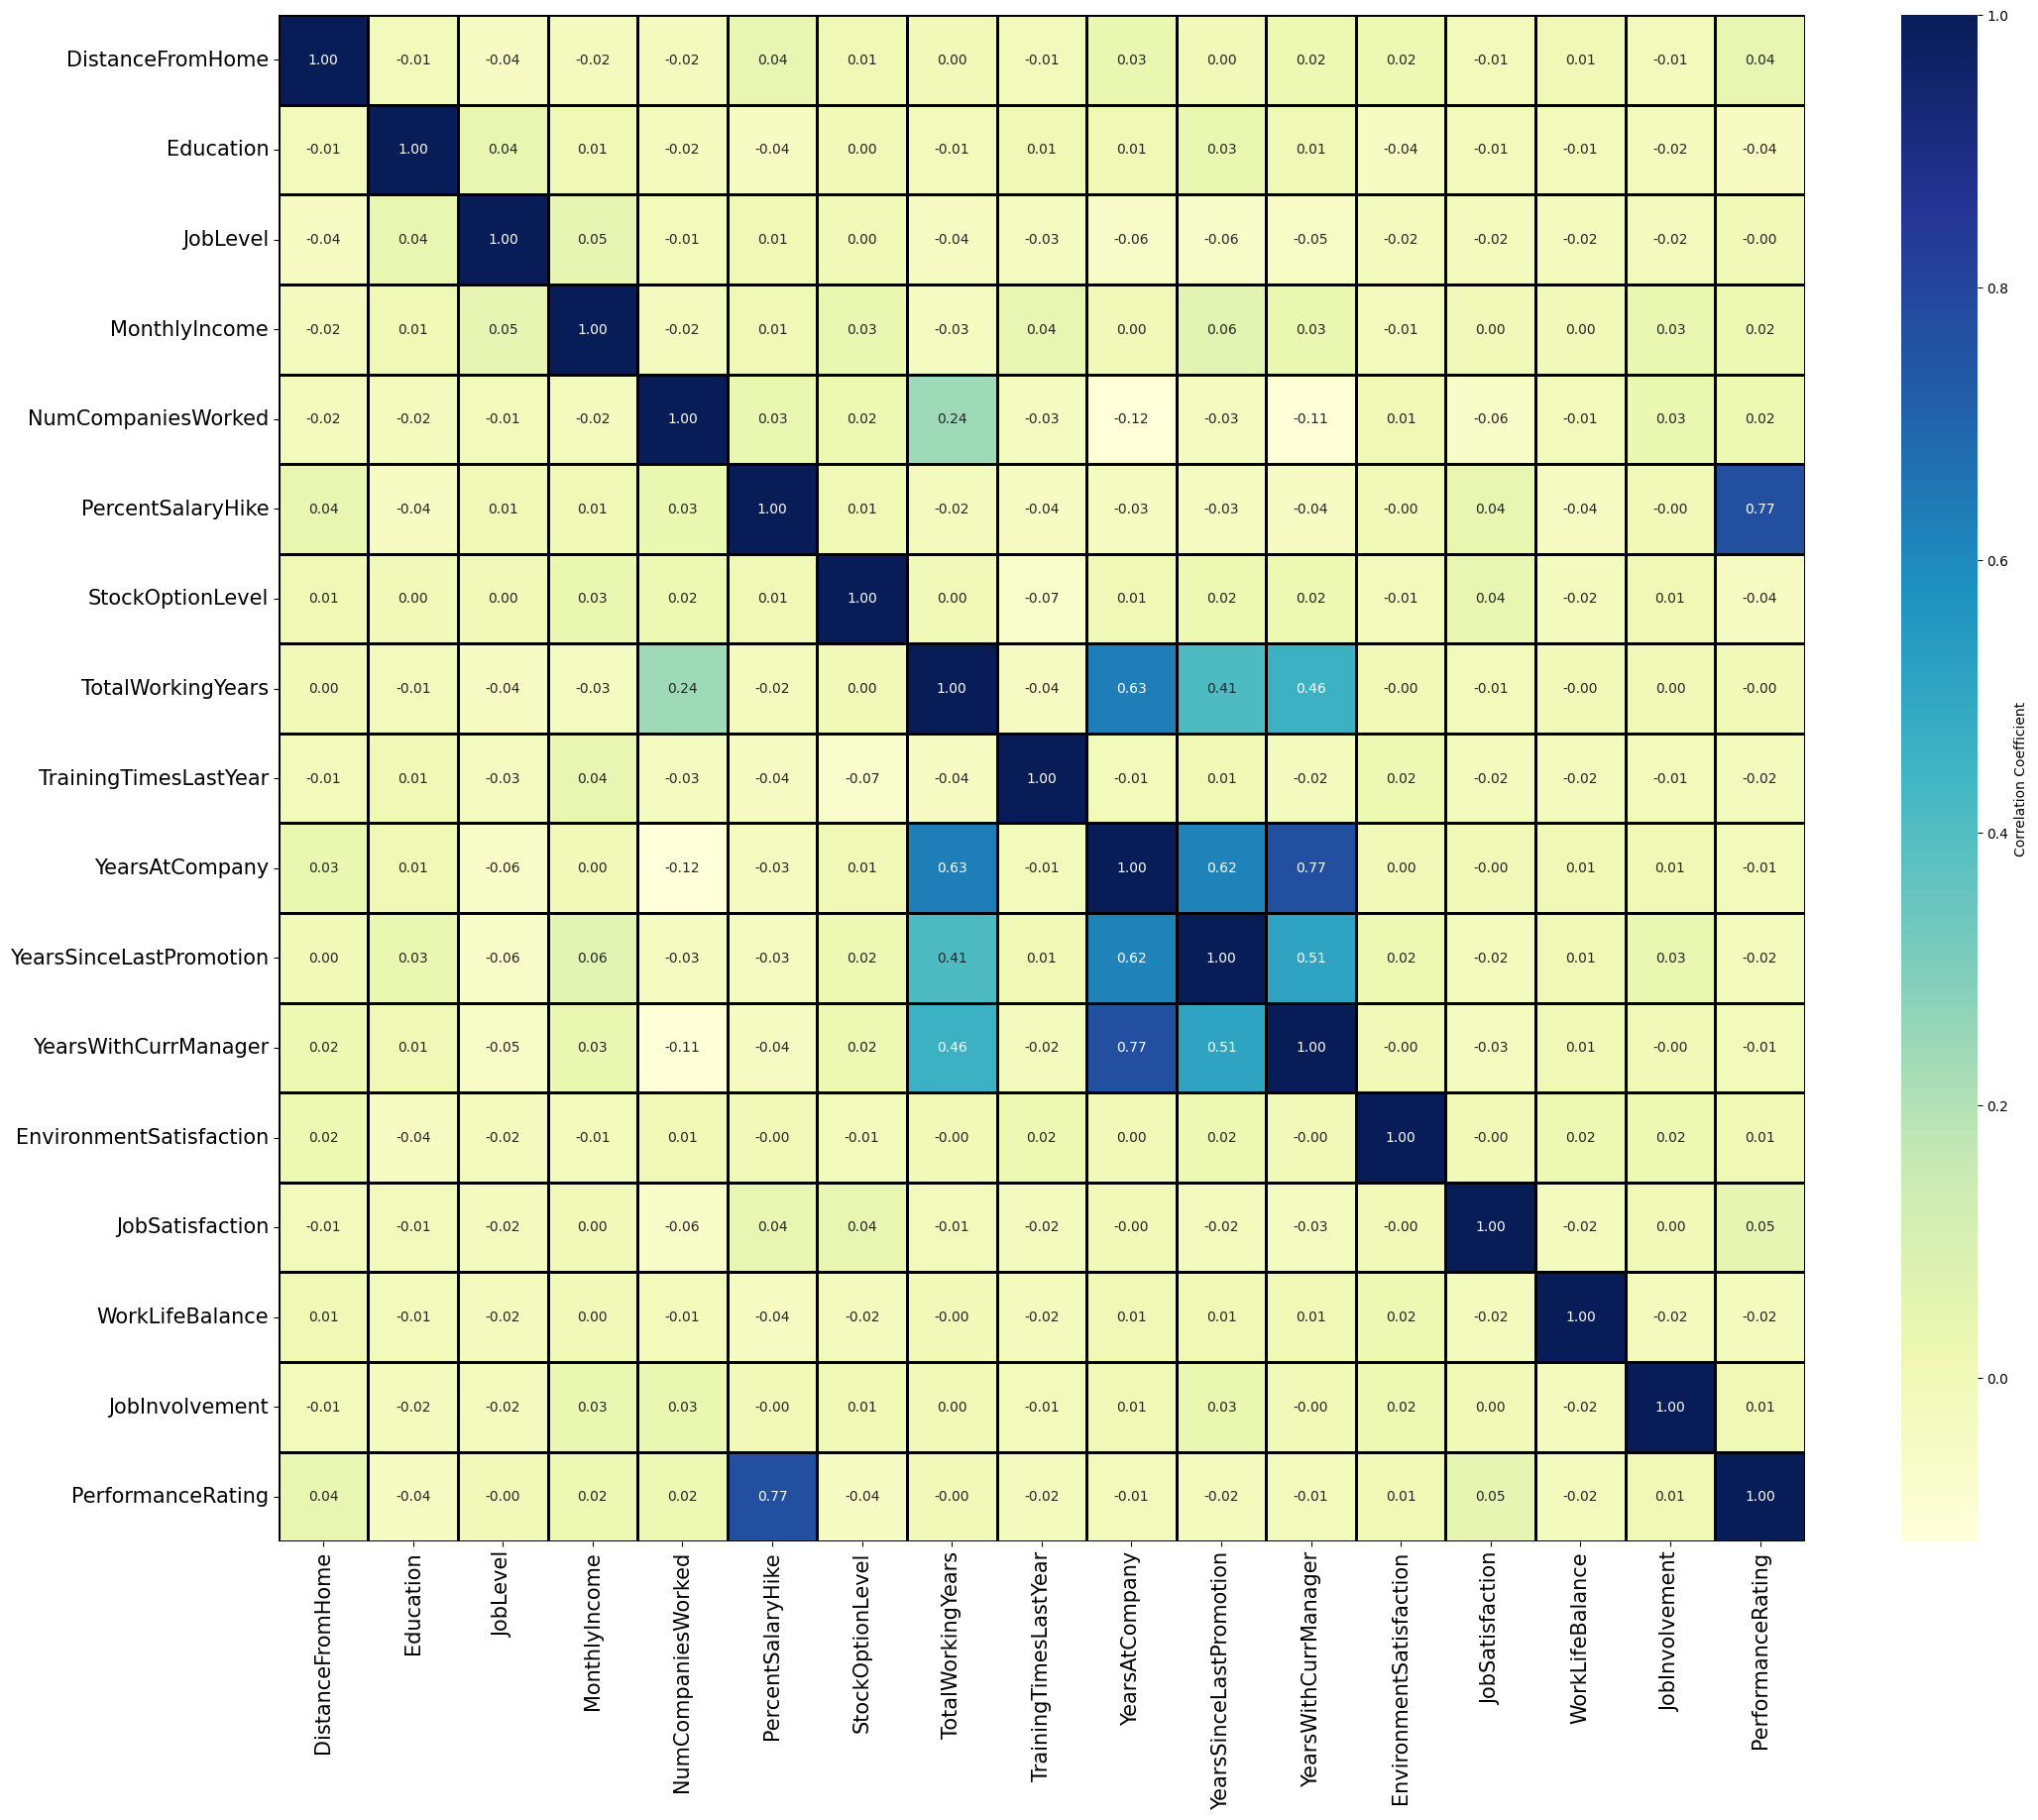

In [88]:
corr = df.corr(numeric_only=True).round(2)

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, annot_kws={'size': 10}, cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'}, fmt=".2f", square=True, linewidth=1, linecolor='black')

plt.xticks(fontsize=15)  # Increase font size of x-axis labels (variable names)
plt.yticks(fontsize=15)  # Increase font size of y-axis labels (variable names)

plt.show()

### Here, looking at the correlation of our variables, we can see that we have a 77% correlation between the PercentSalaryHike and PerformanceRating variable, so let’s eliminate the PercentSalryHike variable. There are others so remove one of the highly correlated values each.

### **Reasons to Remove:**

#### **Multicollinearity**: Highly correlated independent variables can lead to multicollinearity, which can cause problems in statistical models like regression. It can make it difficult to determine the independent effect of each variable on the target variable.

In [89]:
columns_to_drop = ['PercentSalaryHike','YearsAtCompany']
df = df.drop(columns_to_drop, axis =1 )
df.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,JobRole,EducationField,Education,JobLevel,MaritalStatus,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,No,Travel_Rarely,Sales,6,Healthcare Representative,Life Sciences,2,1,Married,131160,...,0,1.0,6,0,0,3.0,4.0,2.0,3,3
1,Yes,Travel_Frequently,Research & Development,10,Research Scientist,Life Sciences,1,1,Single,41890,...,1,6.0,3,1,4,3.0,2.0,4.0,2,4
2,No,Travel_Frequently,Research & Development,17,Sales Executive,Other,4,4,Married,193280,...,3,5.0,2,0,3,2.0,2.0,1.0,3,3
3,No,Non-Travel,Research & Development,2,Human Resources,Life Sciences,5,3,Married,83210,...,3,13.0,5,7,5,4.0,4.0,3.0,2,3
4,No,Travel_Rarely,Research & Development,10,Sales Executive,Medical,1,1,Single,23420,...,2,9.0,2,0,4,4.0,1.0,3.0,3,3


## Categorical Variables

<ipython-input-90-558f03db30e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Attrition', palette = 'Set2', data = df)
<ipython-input-90-558f03db30e3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'BusinessTravel', palette = 'Set2', data = df)
<ipython-input-90-558f03db30e3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Department', palette = 'Set2', data = df)
<ipython-input-90-558f03db30e3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

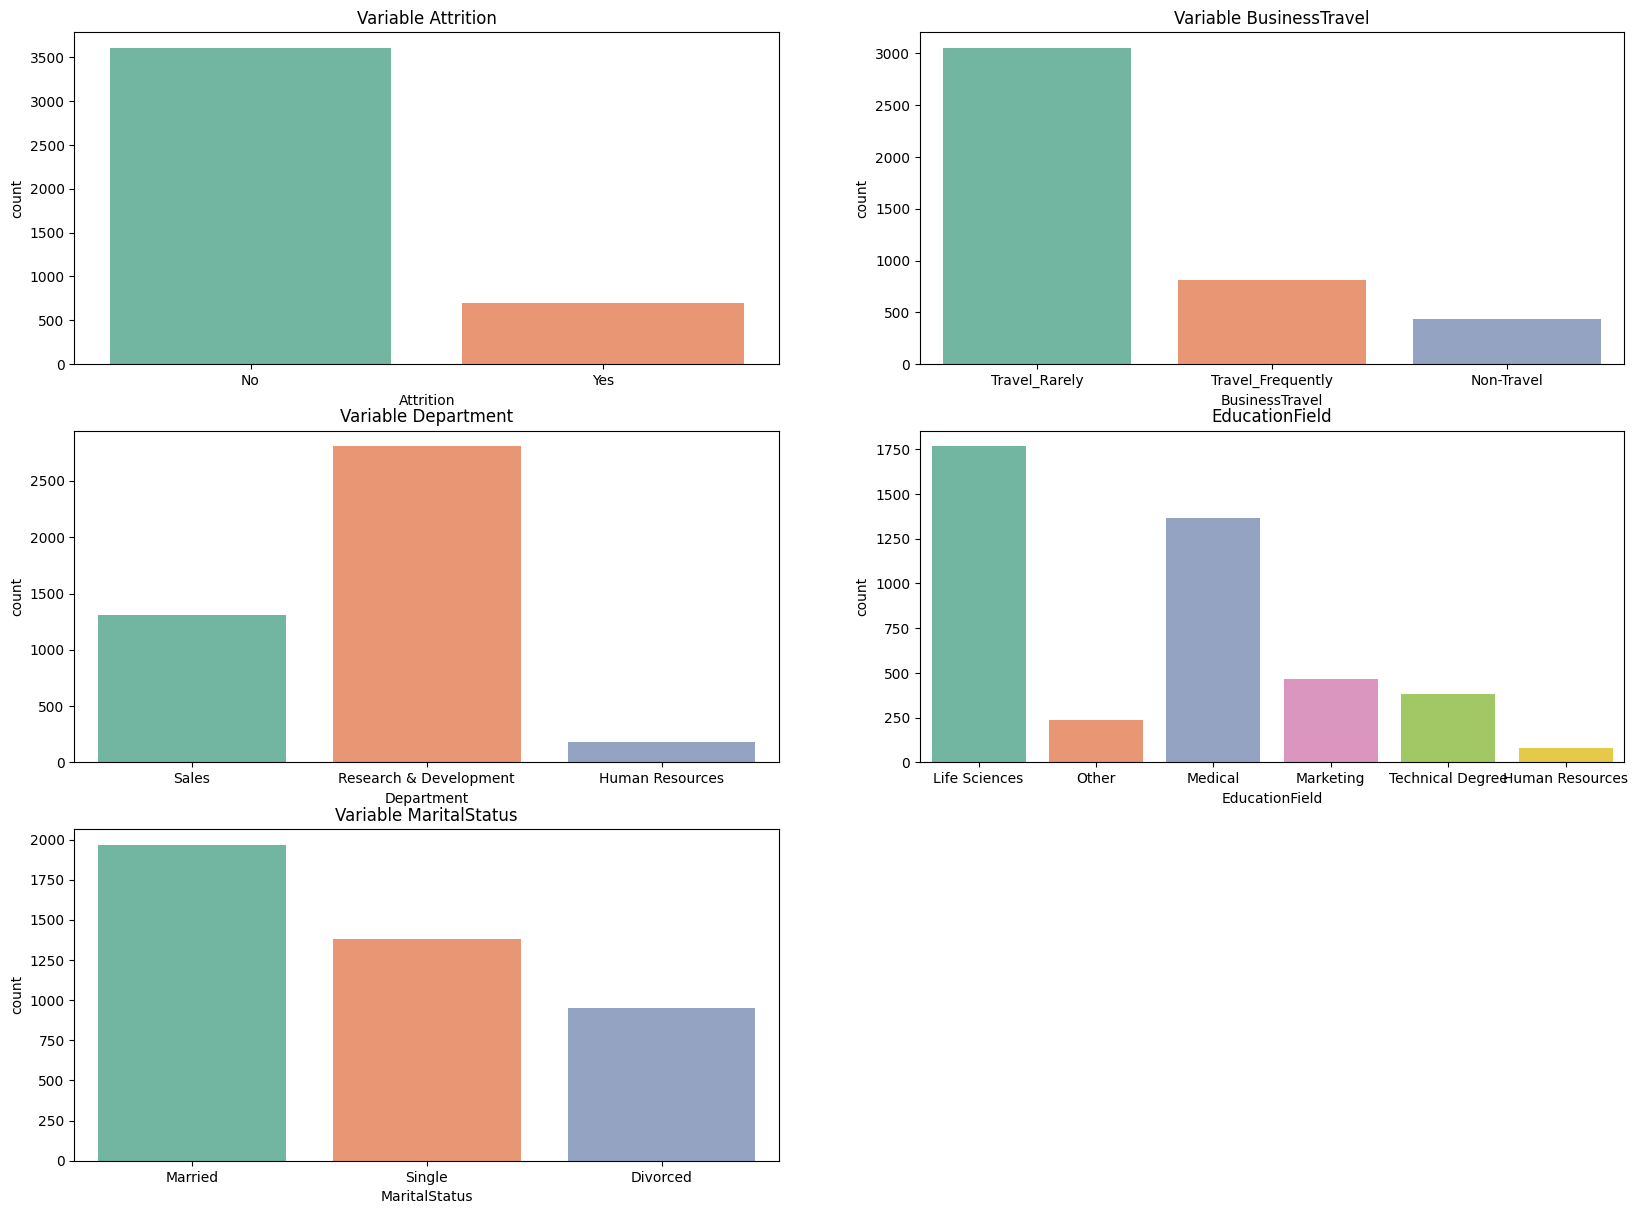

In [90]:
plt.figure(figsize = (20, 25))
plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Attrition')
sns.countplot(x = 'Attrition', palette = 'Set2', data = df)
plt.subplot(5, 2, 2)
plt.gca().set_title('Variable BusinessTravel')
sns.countplot(x = 'BusinessTravel', palette = 'Set2', data = df)
plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Department')
sns.countplot(x = 'Department', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('EducationField')
sns.countplot(x = 'EducationField', palette = 'Set2', data = df)

# plt.subplot(5, 2, 8)
# plt.gca().set_title('Variable Complain')
# sns.countplot(x = 'Complain', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable MaritalStatus')
sns.countplot(x = 'MaritalStatus', palette = 'Set2', data = df)

plt.show()




### Looking at our categorical variables we can see that the employees travel rarely and most employees work in the Research & Development department

## Feature Engineering and Model Building

## One Hot Encoding

In [91]:
# Convert 'Attrition' column to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,JobRole,EducationField,Education,JobLevel,MaritalStatus,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0,Travel_Rarely,Sales,6,Healthcare Representative,Life Sciences,2,1,Married,131160,...,0,1.0,6,0,0,3.0,4.0,2.0,3,3
1,1,Travel_Frequently,Research & Development,10,Research Scientist,Life Sciences,1,1,Single,41890,...,1,6.0,3,1,4,3.0,2.0,4.0,2,4
2,0,Travel_Frequently,Research & Development,17,Sales Executive,Other,4,4,Married,193280,...,3,5.0,2,0,3,2.0,2.0,1.0,3,3
3,0,Non-Travel,Research & Development,2,Human Resources,Life Sciences,5,3,Married,83210,...,3,13.0,5,7,5,4.0,4.0,3.0,2,3
4,0,Travel_Rarely,Research & Development,10,Sales Executive,Medical,1,1,Single,23420,...,2,9.0,2,0,4,4.0,1.0,3.0,3,3


In [92]:
# Convert 'EducationField' column to numeric through mapping
df['EducationField'] = df['EducationField'].map({'Life Sciences': 1, 'Other':2 ,'Medical':3, 'Marketing':4, 'Technical Degree':5,
 'Human Resources':6})
df.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,JobRole,EducationField,Education,JobLevel,MaritalStatus,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0,Travel_Rarely,Sales,6,Healthcare Representative,1,2,1,Married,131160,...,0,1.0,6,0,0,3.0,4.0,2.0,3,3
1,1,Travel_Frequently,Research & Development,10,Research Scientist,1,1,1,Single,41890,...,1,6.0,3,1,4,3.0,2.0,4.0,2,4
2,0,Travel_Frequently,Research & Development,17,Sales Executive,2,4,4,Married,193280,...,3,5.0,2,0,3,2.0,2.0,1.0,3,3
3,0,Non-Travel,Research & Development,2,Human Resources,1,5,3,Married,83210,...,3,13.0,5,7,5,4.0,4.0,3.0,2,3
4,0,Travel_Rarely,Research & Development,10,Sales Executive,3,1,1,Single,23420,...,2,9.0,2,0,4,4.0,1.0,3.0,3,3


In [93]:
# Convert 'JobRole' column to numeric through mapping
df['JobRole'] = df['JobRole'].map({'Healthcare Representative': 1, 'Research Scientist':2, 'Sales Executive':3,
 'Human Resources':4, 'Research Director':5, 'Laboratory Technician':6,
 'Manufacturing Director':7, 'Sales Representative':8, 'Manager':9})
df.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,JobRole,EducationField,Education,JobLevel,MaritalStatus,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0,Travel_Rarely,Sales,6,1,1,2,1,Married,131160,...,0,1.0,6,0,0,3.0,4.0,2.0,3,3
1,1,Travel_Frequently,Research & Development,10,2,1,1,1,Single,41890,...,1,6.0,3,1,4,3.0,2.0,4.0,2,4
2,0,Travel_Frequently,Research & Development,17,3,2,4,4,Married,193280,...,3,5.0,2,0,3,2.0,2.0,1.0,3,3
3,0,Non-Travel,Research & Development,2,4,1,5,3,Married,83210,...,3,13.0,5,7,5,4.0,4.0,3.0,2,3
4,0,Travel_Rarely,Research & Development,10,3,3,1,1,Single,23420,...,2,9.0,2,0,4,4.0,1.0,3.0,3,3


In [94]:
# One-hot encode variables
df = pd.get_dummies(df, columns = ['BusinessTravel', 'Department', 'MaritalStatus'])
df

,Attrition,DistanceFromHome,JobRole,EducationField,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,...,PerformanceRating,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,6,1,1,2,1,131160,1.0,0,1.0,...,3,False,False,True,False,False,True,False,True,False
1,1,10,2,1,1,1,41890,0.0,1,6.0,...,4,False,True,False,False,True,False,False,False,True
2,0,17,3,2,4,4,193280,1.0,3,5.0,...,3,False,True,False,False,True,False,False,True,False
3,0,2,4,1,5,3,83210,3.0,3,13.0,...,3,True,False,False,False,True,False,False,True,False
4,0,10,3,3,1,1,23420,4.0,2,9.0,...,3,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,0,4,4,2,3,2,35390,1.0,0,6.0,...,3,False,False,True,False,False,True,False,False,True
4405,0,5,2,3,4,1,60290,3.0,1,10.0,...,3,False,False,True,False,True,False,False,False,True
4406,0,2,6,3,4,1,26790,2.0,0,10.0,...,3,False,False,True,False,True,False,True,False,False
4407,0,25,3,1,2,2,37020,0.0,0,5.0,...,4,False,False,True,False,True,False,False,True,False


In [95]:
train_dataset = df.copy
train_dataset = train_dataset()
test_dataset = df.copy
test_dataset = test_dataset()

In [96]:
train_dataset.columns

Index(['Attrition', 'DistanceFromHome', 'JobRole', 'EducationField',
       'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [97]:
X = train_dataset.drop("Attrition", axis = 1)
y = train_dataset['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [98]:
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

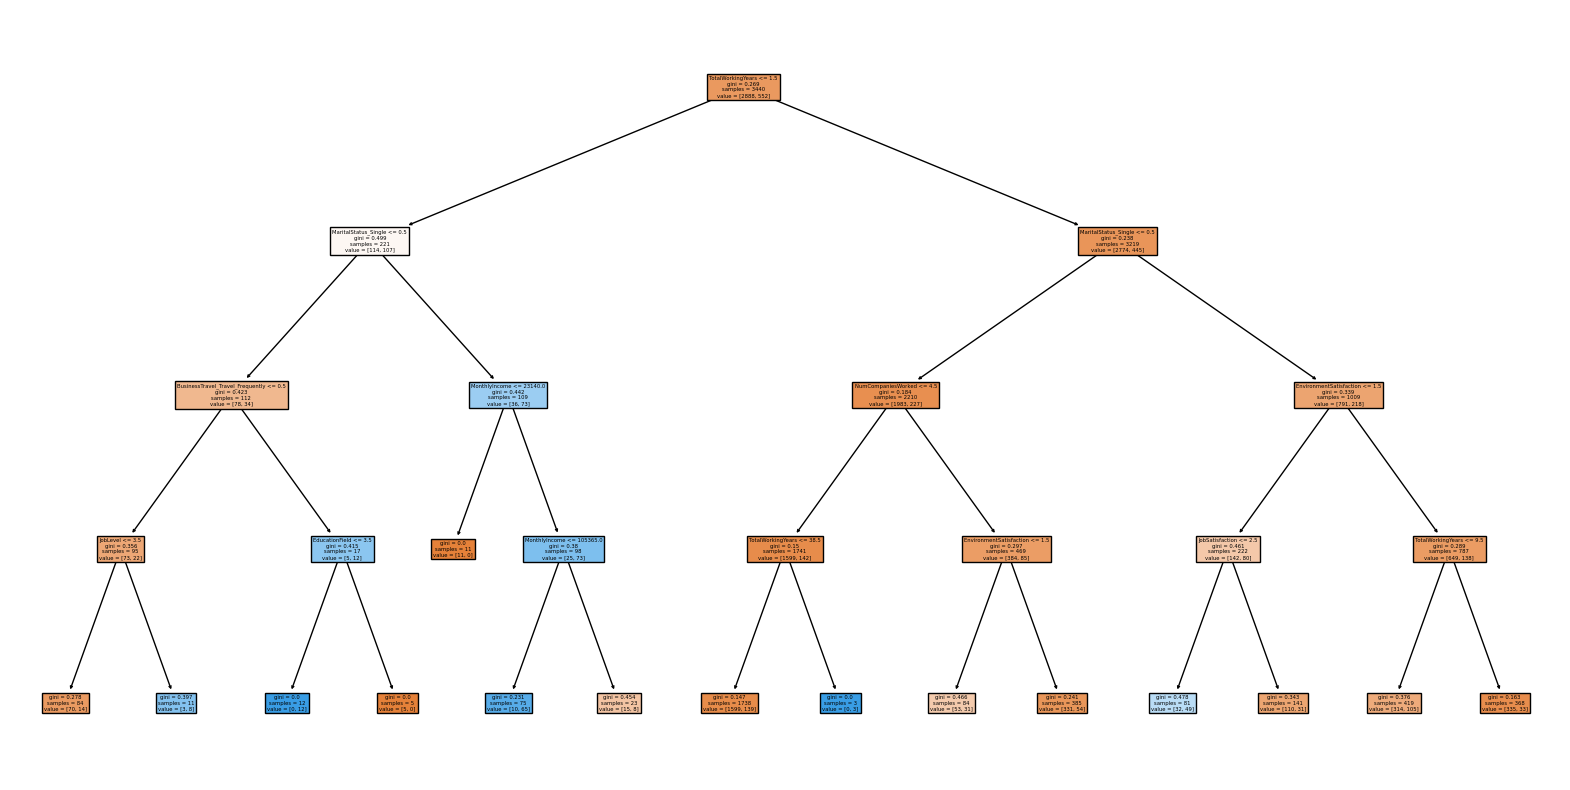

In [106]:
plt.figure(figsize = (20,10))
tree.plot_tree(clf, feature_names= X_train.columns, filled = True)
plt.show()

In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8476744186046512
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       717
           1       0.69      0.15      0.25       143

    accuracy                           0.85       860
   macro avg       0.77      0.57      0.58       860
weighted avg       0.83      0.85      0.80       860

Confusion Matrix:
 [[707  10]
 [121  22]]


In [108]:
feature_importances = clf.feature_importances_
most_important_features = np.argsort(feature_importances)[::-1]

for i in range(7):
  print(X.columns[most_important_features[i]], feature_importances[most_important_features[i]])

TotalWorkingYears 0.36129894685869696
MaritalStatus_Single 0.18207117482811702
MonthlyIncome 0.11419167482570018
EnvironmentSatisfaction 0.10648998139278959
JobSatisfaction 0.08518842013556532
NumCompaniesWorked 0.04098957478427144
EducationField 0.03941209754858275


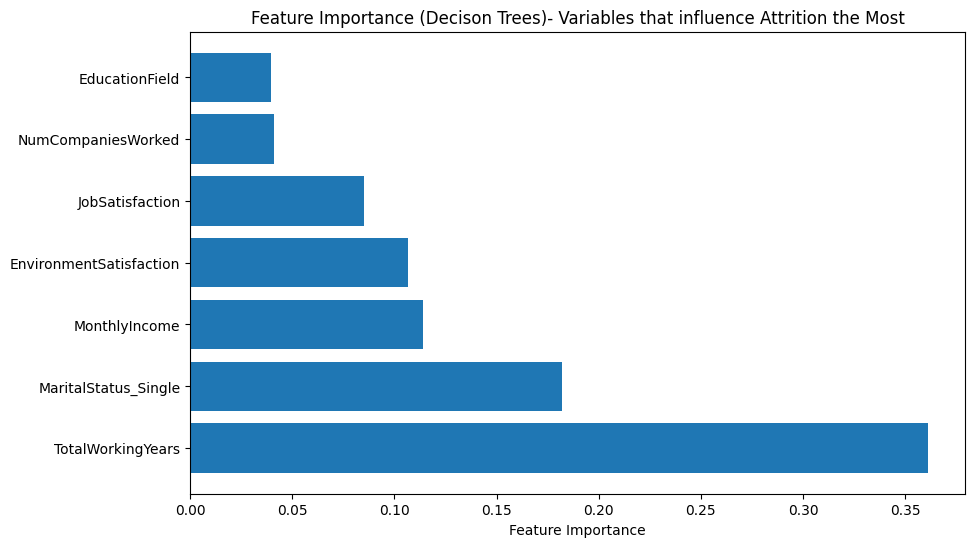

In [116]:
# Get the indices of the most important features
most_important_features = np.argsort(feature_importances)[::-1]

# Get the feature names
feature_names = X.columns[most_important_features]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(most_important_features[:7])), feature_importances[most_important_features[:7]], align='center')
plt.yticks(range(len(most_important_features[:7])), feature_names[:7])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Decison Trees)- Variables that influence Attrition the Most')
plt.show()

## Logistic Regression

In [110]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

y_pred = (y_pred_proba >= 0.5).astype(int)

In [111]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)

print("Confusion Matrix:\n", confusion_mat)

print("ROC-AUC Score:", roc_auc)

print("Precision: \n", precision)

print("Recall:\n", recall)


Accuracy: 0.8337209302325581
Confusion Matrix:
 [[717   0]
 [143   0]]
ROC-AUC Score: 0.6421765124693996
Precision: 
 0.8337209302325581
Recall:
 0.8337209302325581


In [112]:
# Get the feature coefficients
coefs = logistic_model.coef_[0]

# Get the feature names
feature_names = X.columns.tolist()

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefs)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the feature importance
print(feature_importance)

                              Feature  Importance
8                   TotalWorkingYears    0.065639
0                    DistanceFromHome    0.032372
11               YearsWithCurrManager    0.023446
1                             JobRole    0.017020
12            EnvironmentSatisfaction    0.011634
13                    JobSatisfaction    0.011496
16                  PerformanceRating    0.010918
9               TrainingTimesLastYear    0.010742
3                           Education    0.010585
14                    WorkLifeBalance    0.010362
15                     JobInvolvement    0.009792
2                      EducationField    0.008741
6                  NumCompaniesWorked    0.008402
10            YearsSinceLastPromotion    0.007738
4                            JobLevel    0.007424
19       BusinessTravel_Travel_Rarely    0.002884
7                    StockOptionLevel    0.002622
24              MaritalStatus_Married    0.002420
21  Department_Research & Development    0.002258


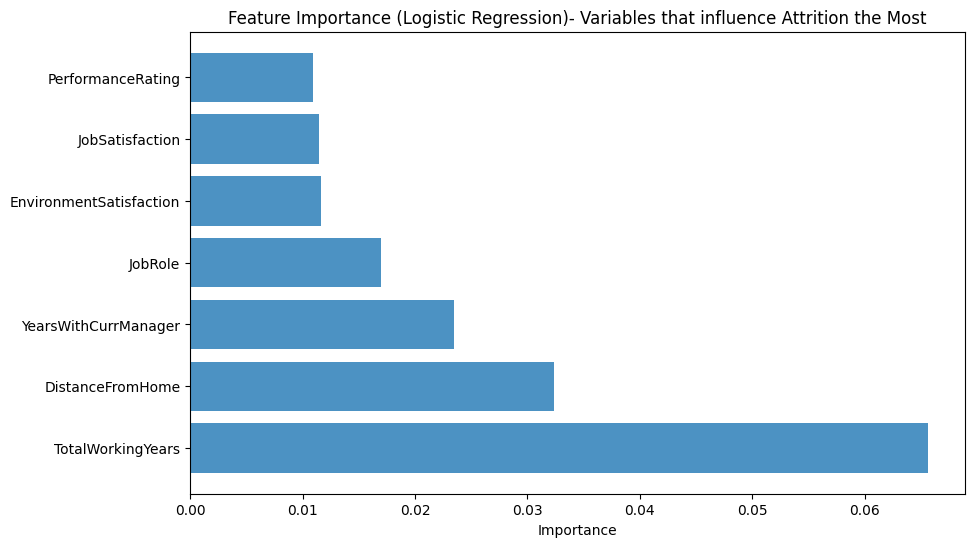

In [117]:
# Sort the feature_importance DataFrame by 'Importance' in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Get the feature names and importance values
feature_names = feature_importance['Feature'].tolist()
importance_values = feature_importance['Importance'].tolist()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names[:7])), importance_values[:7], align='center', alpha=0.8)
plt.yticks(range(len(feature_names[:7])), feature_names[:7])
plt.xlabel('Importance')
plt.title('Feature Importance (Logistic Regression)- Variables that influence Attrition the Most')
plt.show()